# Chapter 4: Machine Learning state of the art
## Figure 4.5-7-8-9-10
Some linear regression on the aging problem (see Chapter 6).

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

## 0. Load the data
### 0.1 Get the raw data
Rows with missing values are simply dropped.

In [35]:
# Load the data (drop NaNs)
df = pd.read_csv('../data/aging_data.csv', header=0, index_col=0).dropna()
columns = df.columns.drop(['age'])
print(columns)

Index([u'gender', u'CO-Pyr/Mal', u'CO-Succinate', u'ATP-Pyr/Mal',
       u'ATP-Succinate', u'PO-Pyr/Mal', u'PO-Succinate', u'ATP', u'AMP',
       u'ATP/AMP', u'MDA', u'LDH'],
      dtype='object')


In [36]:
# Learning data
dfx = df[columns]
dfx.head()

,gender,CO-Pyr/Mal,CO-Succinate,ATP-Pyr/Mal,ATP-Succinate,PO-Pyr/Mal,PO-Succinate,ATP,AMP,ATP/AMP,MDA,LDH
campione,,,,,,,,,,,,
#271/2016,f,6.53,9.18,20.642016,10.120000,3.161105,1.102397,0.289389,0.072347,4.000000,1.961658,202.572347
#08/2017,m,11.42,8.16,30.920777,11.240000,2.707599,1.377451,0.281350,0.096463,2.916667,0.624164,144.694534
#250/2016,m,18.56,11.73,43.274765,23.303857,2.331615,1.986689,0.273312,0.080386,3.400000,1.515827,192.926045
#251/2016,f,17.94,11.79,51.199060,23.508654,2.853905,1.993949,0.321543,0.088424,3.636364,0.624164,185.423365
#252/2016,m,16.83,11.32,34.307632,18.547368,2.038481,1.638460,0.265273,0.060289,4.400000,1.069996,197.213290


In [37]:
# Learning labels
dfy = df['age']
dfy.head()

campione
#271/2016     9
#08/2017      8
#250/2016    10
#251/2016    10
#252/2016    10
Name: age, dtype: int64

### 0.2 Categorical variable encoding
The `gender` variable is converted as: `m\f` $\rightarrow$ `0\1`.

In [38]:
# Convert gender [m/f] in [0,1]
dfx.loc[:, 'gender'] = dfx['gender'].apply(lambda x: int(x == 'f'))
dfx.head()

,gender,CO-Pyr/Mal,CO-Succinate,ATP-Pyr/Mal,ATP-Succinate,PO-Pyr/Mal,PO-Succinate,ATP,AMP,ATP/AMP,MDA,LDH
campione,,,,,,,,,,,,
#271/2016,1,6.53,9.18,20.642016,10.120000,3.161105,1.102397,0.289389,0.072347,4.000000,1.961658,202.572347
#08/2017,0,11.42,8.16,30.920777,11.240000,2.707599,1.377451,0.281350,0.096463,2.916667,0.624164,144.694534
#250/2016,0,18.56,11.73,43.274765,23.303857,2.331615,1.986689,0.273312,0.080386,3.400000,1.515827,192.926045
#251/2016,1,17.94,11.79,51.199060,23.508654,2.853905,1.993949,0.321543,0.088424,3.636364,0.624164,185.423365
#252/2016,0,16.83,11.32,34.307632,18.547368,2.038481,1.638460,0.265273,0.060289,4.400000,1.069996,197.213290


### 0.3 Preprocess data
The dataset is preprocessed applying a column-wise standard scaling.

In [39]:
from sklearn.preprocessing import StandardScaler

dfx.iloc[:,1:] = StandardScaler().fit_transform(dfx.values[:,1:])
dfx.head()

,gender,CO-Pyr/Mal,CO-Succinate,ATP-Pyr/Mal,ATP-Succinate,PO-Pyr/Mal,PO-Succinate,ATP,AMP,ATP/AMP,MDA,LDH
campione,,,,,,,,,,,,
#271/2016,1,-1.218285,-0.680111,0.038583,-0.506606,1.705053,0.073843,-1.186522,-1.954194,1.745473,-1.073164,-0.755477
#08/2017,0,-0.600006,-0.803442,0.778625,-0.316842,1.249892,0.570257,-1.203836,-1.850270,0.808230,-1.403878,-1.501167
#250/2016,0,0.302758,-0.371784,1.668078,1.727163,0.872536,1.669799,-1.221151,-1.919553,1.226385,-1.183402,-0.879758
#251/2016,1,0.224367,-0.364529,2.238605,1.761862,1.396733,1.682902,-1.117264,-1.884911,1.430874,-1.403878,-0.976422
#252/2016,0,0.084022,-0.421358,1.022469,0.921261,0.578333,1.041322,-1.238465,-2.006155,2.091532,-1.293640,-0.824522


### 0.4 Training/Test split

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.33, random_state=42)

print('{} variables'.format(x_train.shape[1]))
print('{} training samples'.format(x_train.shape[0]))
print('{} test samples'.format(x_test.shape[0]))

12 variables
74 training samples
37 test samples


## 1. Ordinary least squares

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

model = LinearRegression()
model.fit(x_train.values, y_train.values)
ols_norms = [np.sqrt(np.sum(model.coef_**2)), np.sum(np.abs(model.coef_))]

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('EVS: {:2.5f}'.format(evs))
print('R2: {:2.3f}'.format(r2))
print('MAE: {:2.3f}'.format(mae))
print('L2-norm(w): {:2.3f}'.format(ols_norms[0]))
print('L1-norm(w): {:2.3f}'.format(ols_norms[1]))

EVS: 0.74286
R2: 0.735
MAE: 10.598
L2-norm(w): 20.259
L1-norm(w): 53.814


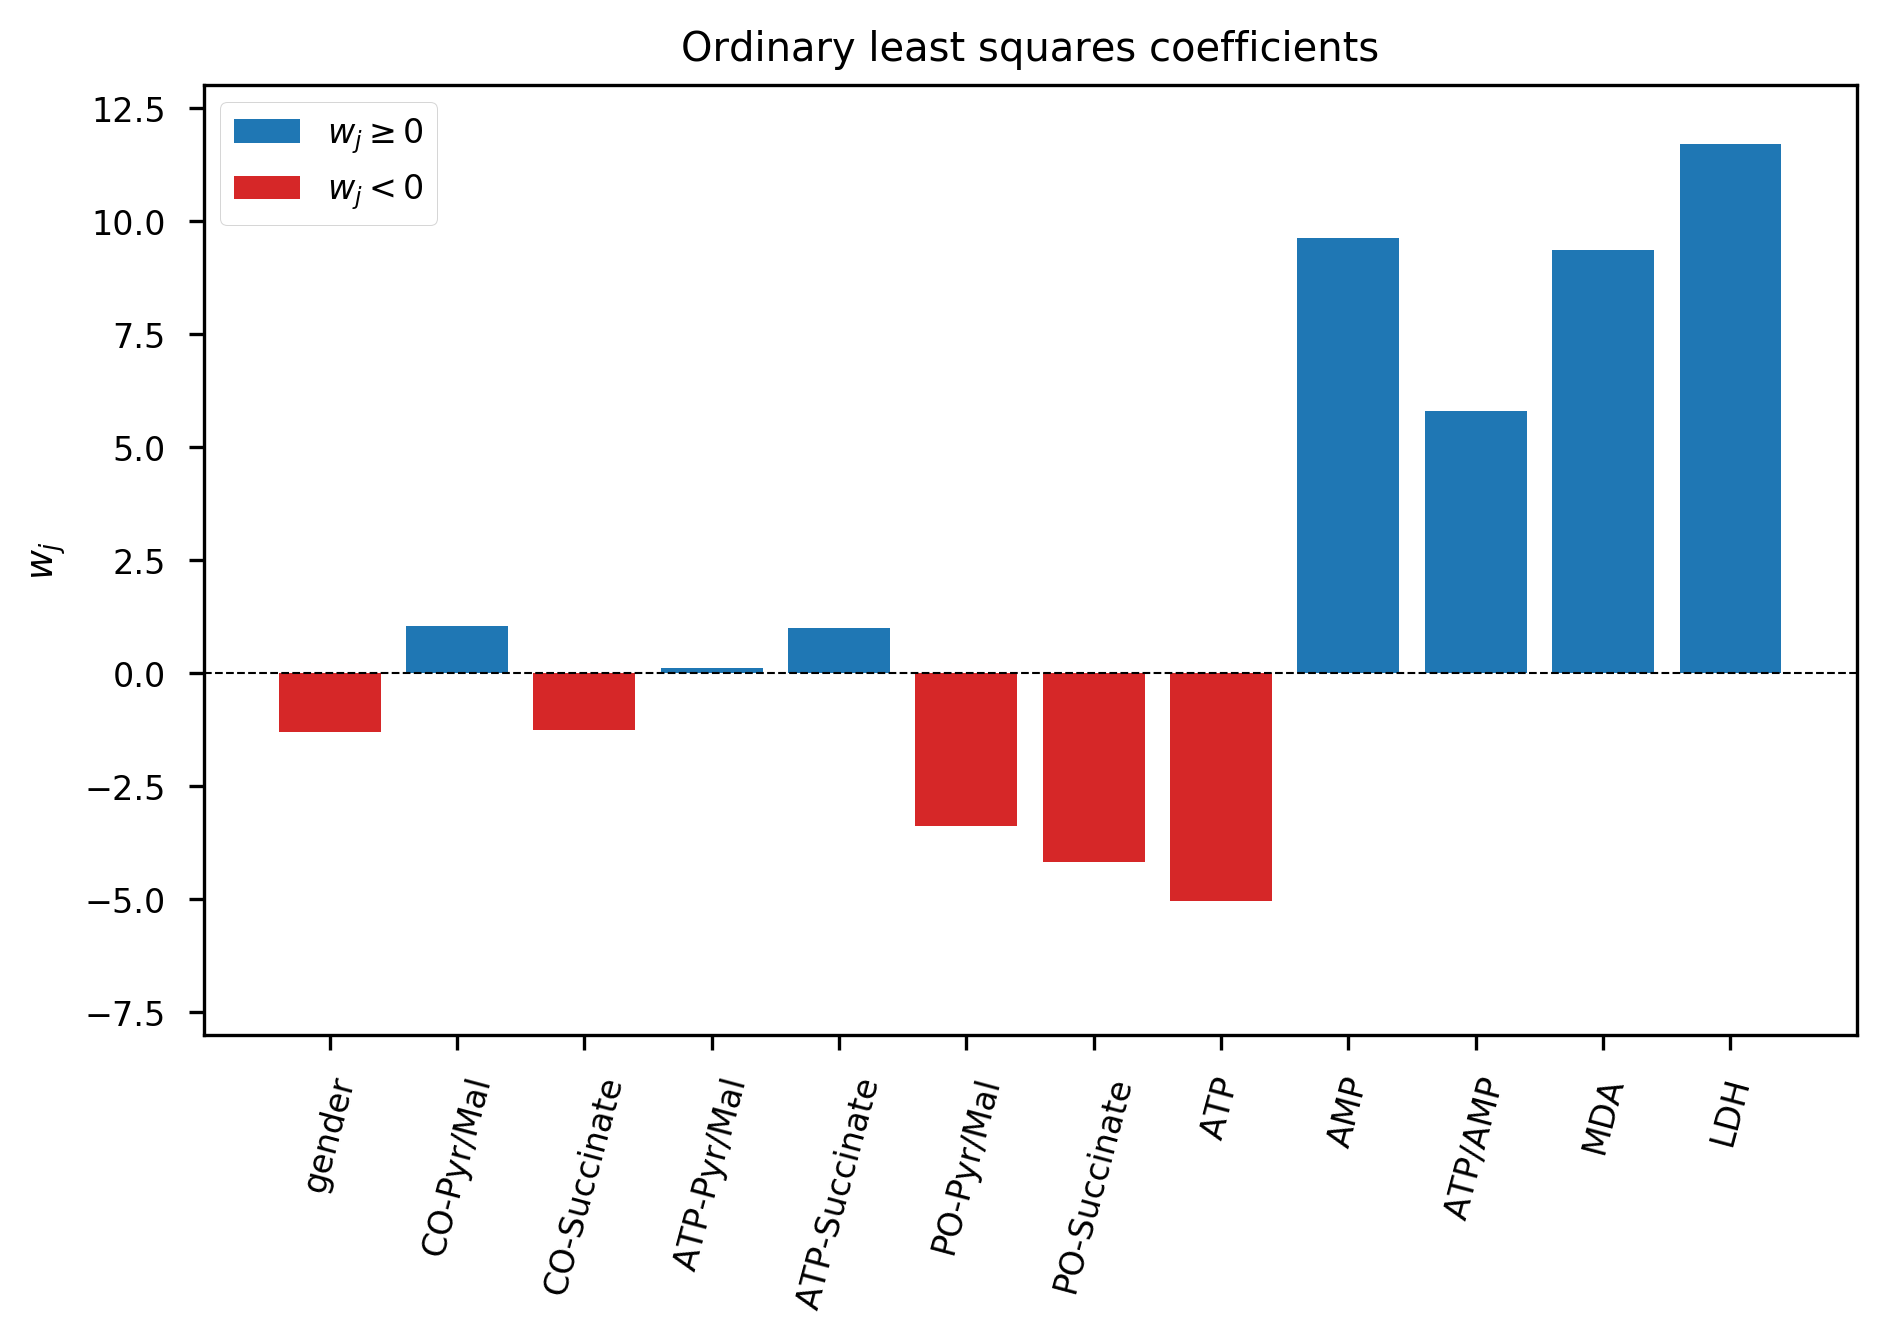

In [42]:
plt.figure(dpi=300)

xaxis = np.arange(x_train.shape[1])
pos_idx = np.where(model.coef_ >= 0)[0]
neg_idx = np.where(model.coef_ < 0)[0]
plt.bar(xaxis[pos_idx], model.coef_[pos_idx], label=r'$w_j \geq 0$', color='C0') # positive coefs
plt.bar(xaxis[neg_idx], model.coef_[neg_idx], label=r'$w_j < 0$', color='C3') # negative coefs
plt.axhline(color='k', linewidth=0.5, linestyle='dashed')
plt.ylabel(r'$w_j$')
plt.xticks(xaxis, dfx.columns, rotation=75)
plt.ylim([-8, 13])
plt.legend(loc=2)
plt.tight_layout()
plt.title('Ordinary least squares coefficients')
plt.savefig('../images/coefs_ols.png', bbox_inches='tight');

## 2. Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(Ridge(), param_grid={'alpha': np.logspace(-3, 2, 30)})
model.fit(x_train.values, y_train.values)
ridge_norms = [np.sqrt(np.sum(model.best_estimator_.coef_**2)), np.sum(np.abs(model.best_estimator_.coef_))]

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('alpha: {:2.5f}'.format(model.best_estimator_.alpha))
print('EVS: {:2.5f}'.format(evs))
print('R2: {:2.3f}'.format(r2))
print('MAE: {:2.3f}'.format(mae))
print('L2-norm(w): {:2.3f}'.format(ridge_norms[0]))
print('L1-norm(w): {:2.3f}'.format(ridge_norms[1]))

alpha: 20.43360
EVS: 0.81189
R2: 0.802
MAE: 8.615
L2-norm(w): 12.476
L1-norm(w): 33.071


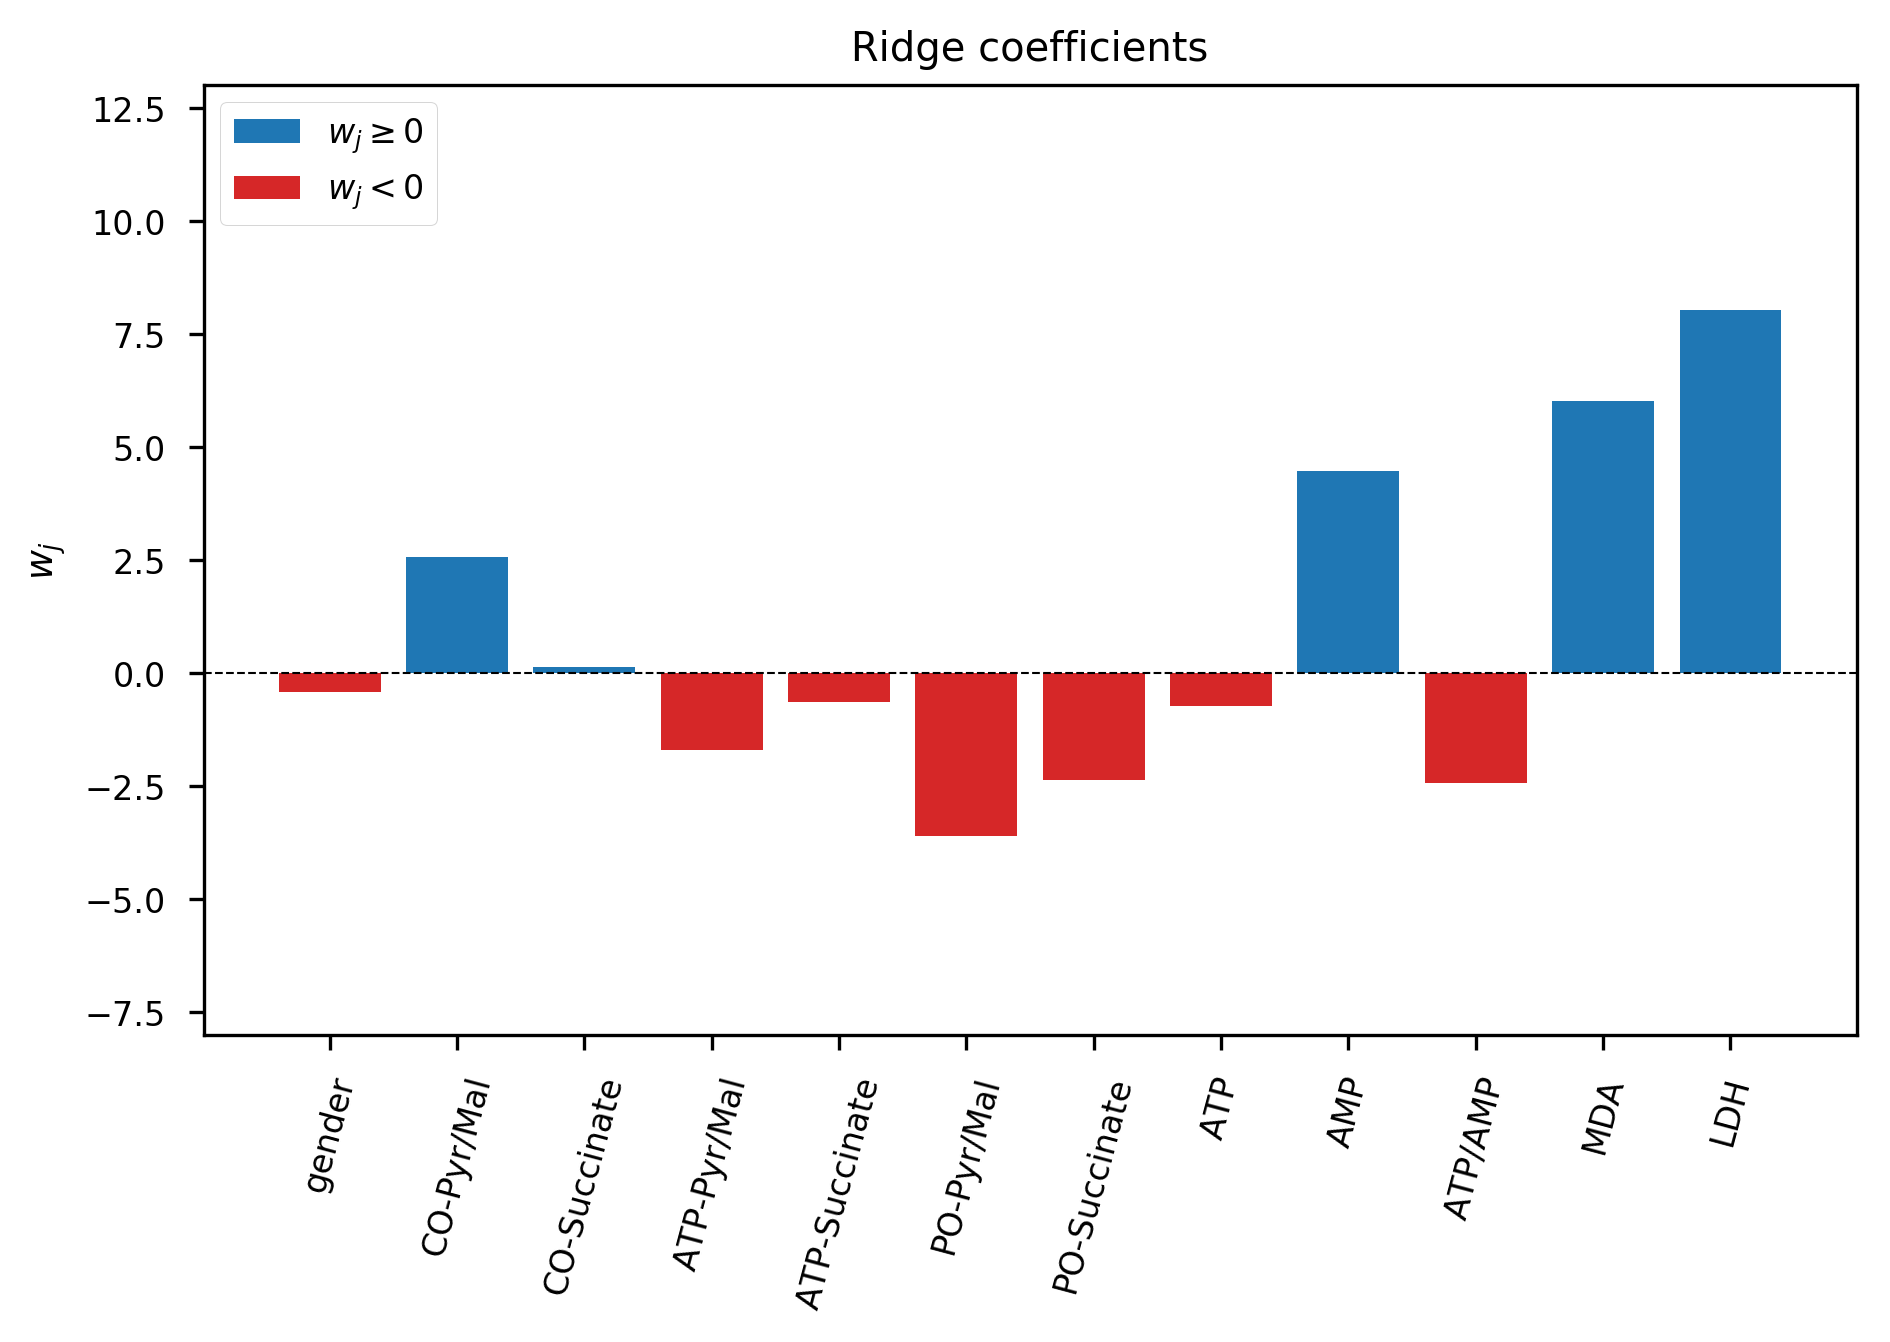

In [44]:
plt.figure(dpi=300)

xaxis = np.arange(x_train.shape[1])
pos_idx = np.where(model.best_estimator_.coef_ >= 0)[0]
neg_idx = np.where(model.best_estimator_.coef_ < 0)[0]
plt.bar(xaxis[pos_idx], model.best_estimator_.coef_[pos_idx], label=r'$w_j \geq 0$', color='C0') # positive coefs
plt.bar(xaxis[neg_idx], model.best_estimator_.coef_[neg_idx], label=r'$w_j < 0$', color='C3') # negative coefs
plt.axhline(color='k', linewidth=0.5, linestyle='dashed')
plt.ylabel(r'$w_j$')
plt.xticks(xaxis, dfx.columns, rotation=75)
plt.ylim([-8, 13])
plt.legend(loc=2)
plt.tight_layout()
plt.title('Ridge coefficients')
plt.savefig('../images/coefs_ridge.png', bbox_inches='tight');

## 3. Lasso

In [45]:
from sklearn.linear_model import Lasso

model = GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(-3, 2, 30)})
model.fit(x_train.values, y_train.values)
lasso_norms = [np.sqrt(np.sum(model.best_estimator_.coef_**2)), np.sum(np.abs(model.best_estimator_.coef_))]

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('alpha: {:2.5f}'.format(model.best_estimator_.alpha))
print('EVS: {:2.5f}'.format(evs))
print('R2: {:2.3f}'.format(r2))
print('MAE: {:2.3f}'.format(mae))
print('L2-norm(w): {:2.3f}'.format(lasso_norms[0]))
print('L1-norm(w): {:2.3f}'.format(lasso_norms[1]))

alpha: 1.26896
EVS: 0.81507
R2: 0.808
MAE: 8.387
L2-norm(w): 16.285
L1-norm(w): 29.813


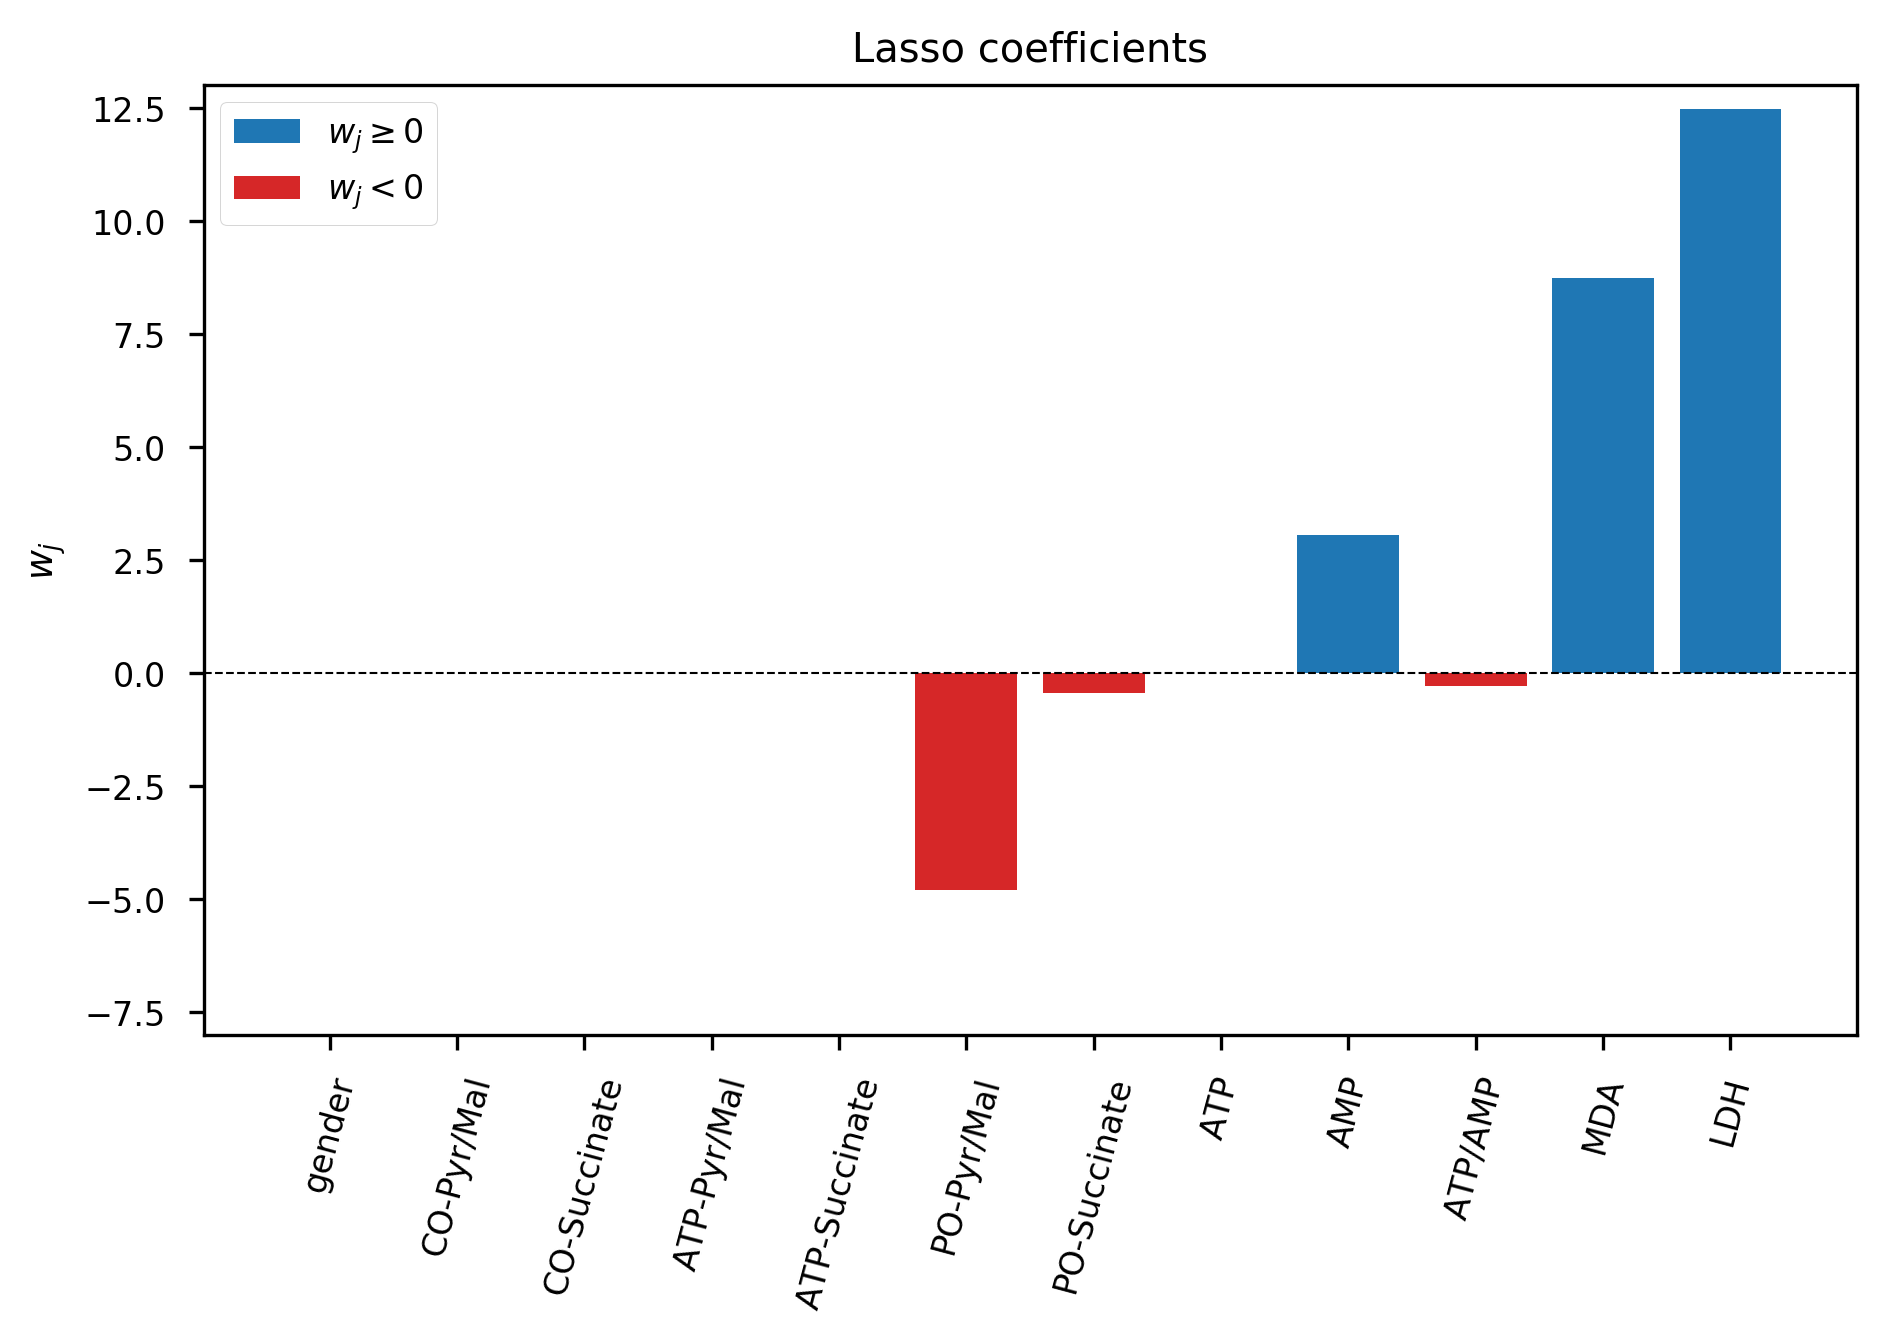

In [46]:
plt.figure(dpi=300)

xaxis = np.arange(x_train.shape[1])
pos_idx = np.where(model.best_estimator_.coef_ >= 0)[0]
neg_idx = np.where(model.best_estimator_.coef_ < 0)[0]
plt.bar(xaxis[pos_idx], model.best_estimator_.coef_[pos_idx], label=r'$w_j \geq 0$', color='C0') # positive coefs
plt.bar(xaxis[neg_idx], model.best_estimator_.coef_[neg_idx], label=r'$w_j < 0$', color='C3') # negative coefs
plt.axhline(color='k', linewidth=0.5, linestyle='dashed')
plt.ylabel(r'$w_j$')
plt.xticks(xaxis, dfx.columns, rotation=75)
plt.ylim([-8, 13])
plt.legend(loc=2)
plt.tight_layout()
plt.title('Lasso coefficients')
plt.savefig('../images/coefs_lasso.png', bbox_inches='tight');

# 4. Elastic-Net

In [47]:
from sklearn.linear_model import ElasticNet

model = GridSearchCV(ElasticNet(), param_grid={'alpha': np.logspace(-3, 2, 30),
                                               'l1_ratio': np.linspace(1e-5, 2, 30)})
model.fit(x_train.values, y_train.values)
enet_norms = [np.sqrt(np.sum(model.best_estimator_.coef_**2)), np.sum(np.abs(model.best_estimator_.coef_))]

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('alpha: {:2.5f}'.format(model.best_estimator_.alpha))
print('l1_ratio: {:2.5f}'.format(model.best_estimator_.l1_ratio))
print('EVS: {:2.5f}'.format(evs))
print('R2: {:2.3f}'.format(r2))
print('MAE: {:2.3f}'.format(mae))
print('L2-norm(w): {:2.3f}'.format(enet_norms[0]))
print('L1-norm(w): {:2.3f}'.format(enet_norms[1]))

alpha: 0.57362
l1_ratio: 0.48277
EVS: 0.82129
R2: 0.812
MAE: 8.321
L2-norm(w): 12.244
L1-norm(w): 31.670


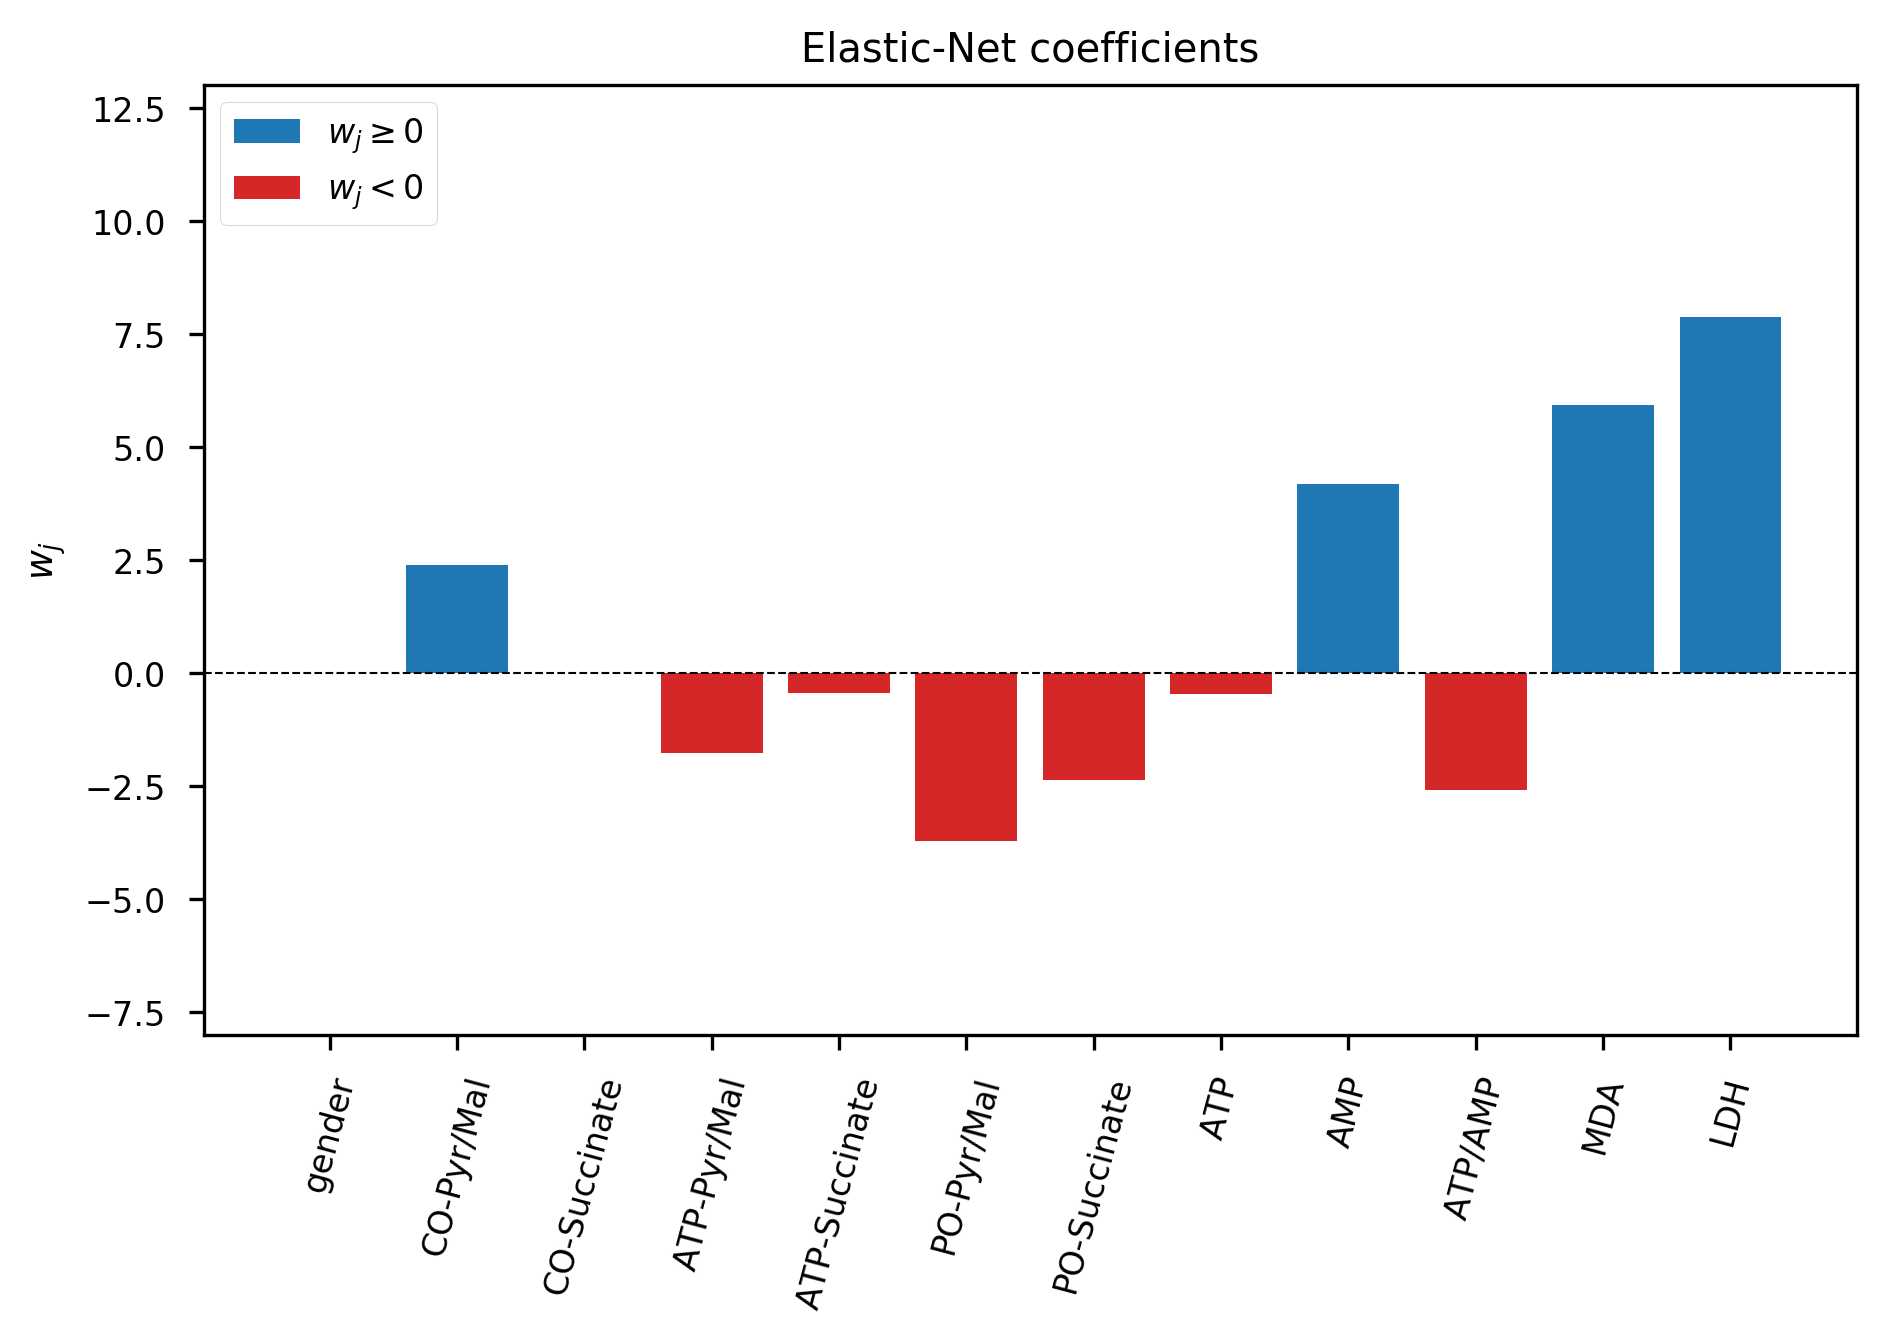

In [48]:
plt.figure(dpi=300)

xaxis = np.arange(x_train.shape[1])
pos_idx = np.where(model.best_estimator_.coef_ >= 0)[0]
neg_idx = np.where(model.best_estimator_.coef_ < 0)[0]
plt.bar(xaxis[pos_idx], model.best_estimator_.coef_[pos_idx], label=r'$w_j \geq 0$', color='C0') # positive coefs
plt.bar(xaxis[neg_idx], model.best_estimator_.coef_[neg_idx], label=r'$w_j < 0$', color='C3') # negative coefs
plt.axhline(color='k', linewidth=0.5, linestyle='dashed')
plt.ylabel(r'$w_j$')
plt.xticks(xaxis, dfx.columns, rotation=75)
plt.ylim([-8, 13])
plt.legend(loc=2)
plt.tight_layout()
plt.title('Elastic-Net coefficients')
plt.savefig('../images/coefs_enet.png', bbox_inches='tight');

# $\ell_1\ell_2$-norms scatterplot

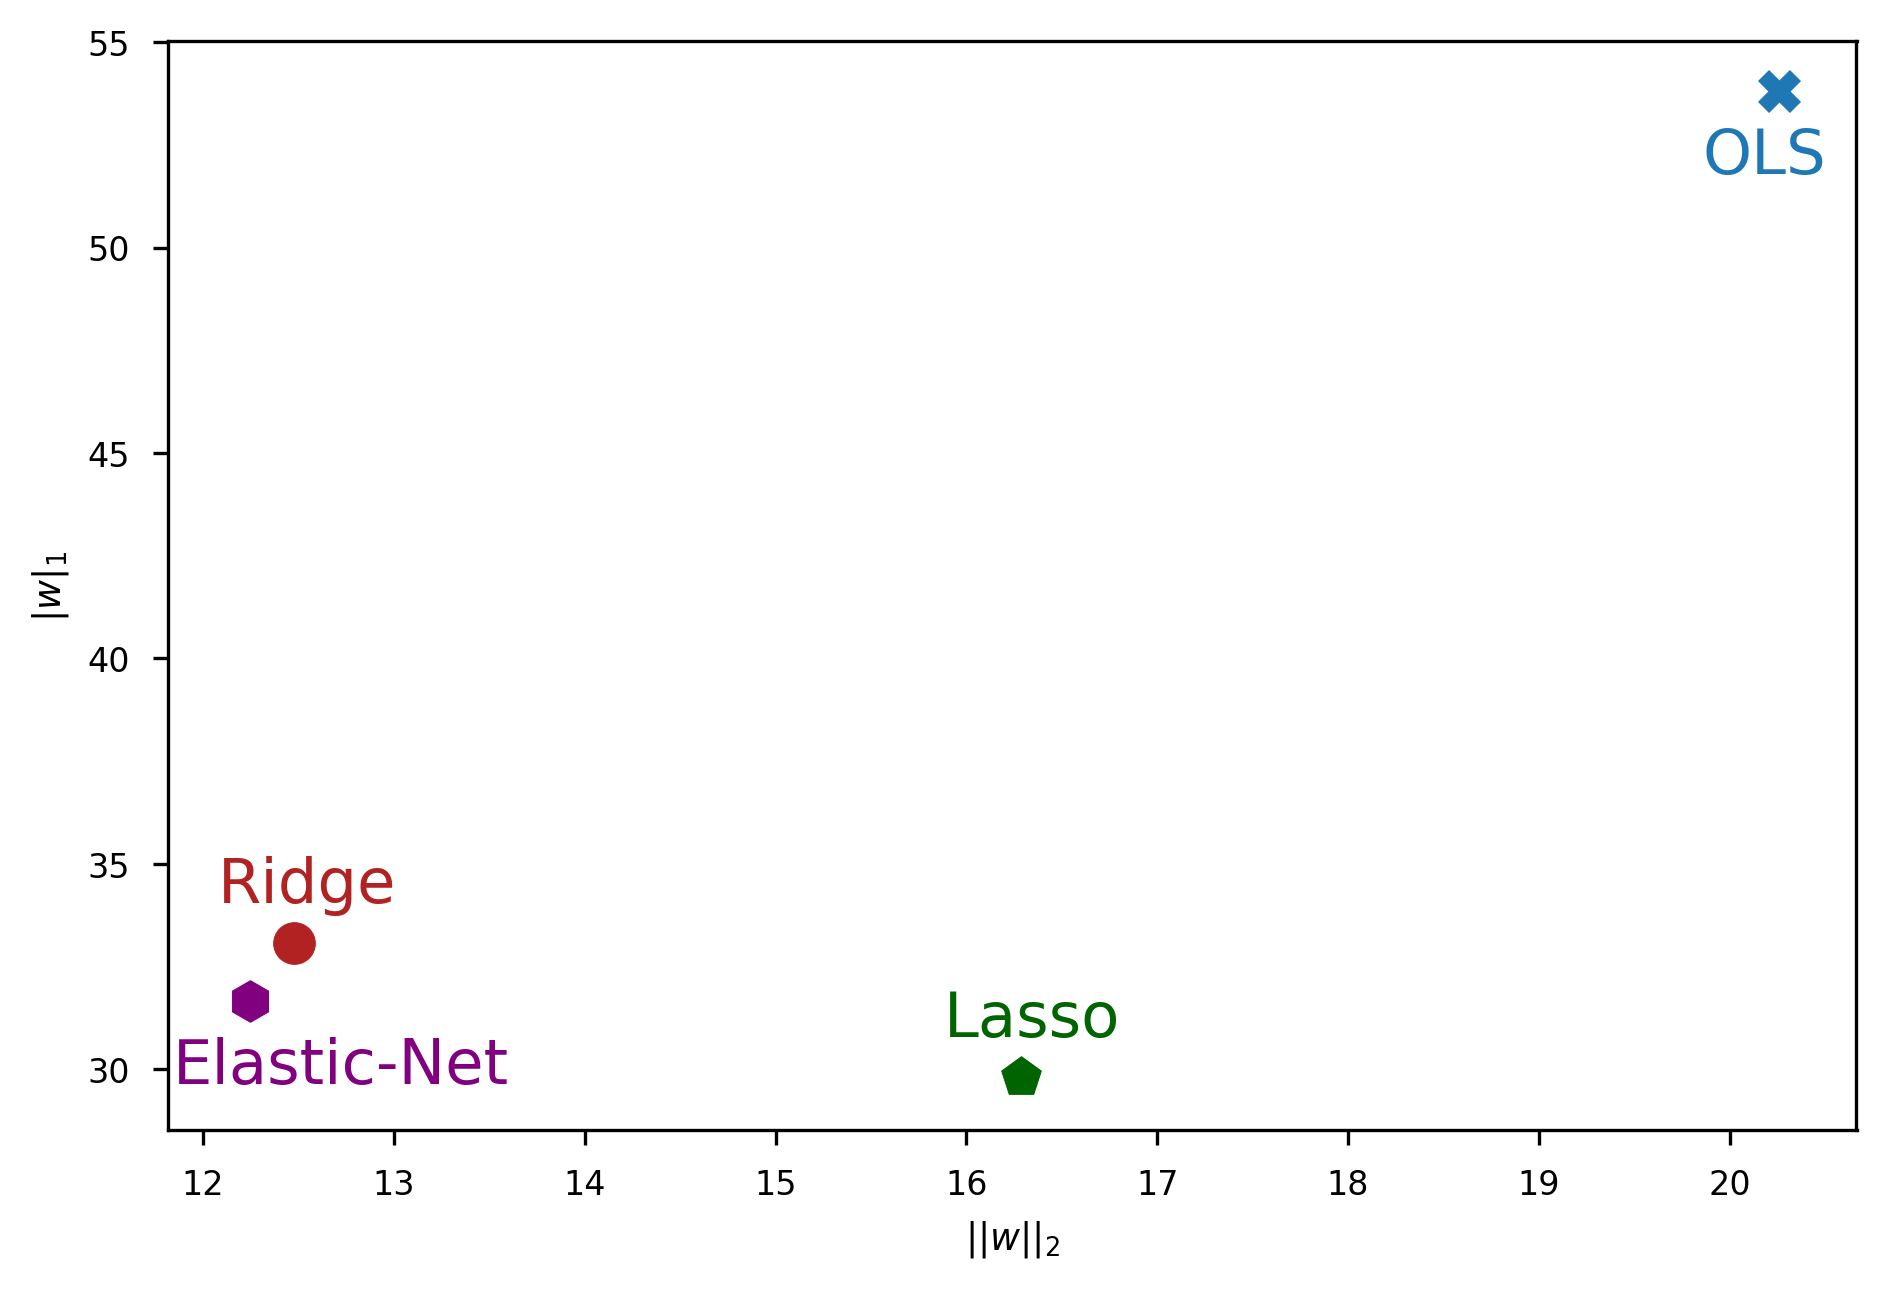

In [49]:
plt.figure(dpi=300)

plt.scatter(ols_norms[0], ols_norms[1], s=100, label='OLS', marker='X', color='C0')
plt.scatter(ridge_norms[0], ridge_norms[1], s=100, label='Ridge', marker='o', color='firebrick')
plt.scatter(lasso_norms[0], lasso_norms[1], s=100, label='Lasso', marker='p', color='darkgreen')
plt.scatter(enet_norms[0], enet_norms[1], s=100, label='Elastic-Net', marker='h', color='purple')

plt.text(ols_norms[0]-0.4, ols_norms[1]-2, s='OLS', fontsize='15', color='C0')
plt.text(ridge_norms[0]-0.4, ridge_norms[1]+1, s='Ridge', fontsize='15', color='firebrick')
plt.text(lasso_norms[0]-0.4, lasso_norms[1]+1, s='Lasso', fontsize='15', color='darkgreen')
plt.text(enet_norms[0]-0.4, enet_norms[1]-2, s='Elastic-Net', fontsize='15', color='purple')


plt.xlabel(r'$||w||_2$')
plt.ylabel(r'$|w|_1$')
plt.tight_layout()
plt.savefig('../images/l1l2_norms_scatterplot.png');